# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import requests
import time
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [108]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

print(cities)


['albany', 'dikson', 'kapaa', 'bani', 'barrow', 'aripuana', 'reno', 'khatanga', 'amderma', 'port hardy', 'atar', 'touros', 'cape town', 'qaanaaq', 'krasnoselkup', 'saleaula', 'nizhneyansk', 'staryy nadym', 'pacific grove', 'ushuaia', 'manga', 'moose factory', 'huazolotitlan', 'port alfred', 'hermanus', 'alofi', 'yar-sale', 'saint-philippe', 'letnica', 'tezu', 'nyurba', 'visnes', 'pryazha', 'hithadhoo', 'carnarvon', 'bredasdorp', 'fortuna', 'coihaique', 'marsh harbour', 'yandoon', 'sola', 'whitehorse', 'wanning', 'kedrovyy', 'lagoa', 'butaritari', 'klaksvik', 'thompson', 'bluff', 'pemberton', 'punta arenas', 'provideniya', 'mataura', 'manokwari', 'hilo', 'progreso', 'port lincoln', 'taolanaro', 'weyburn', 'aloleng', 'bhimavaram', 'sitka', 'nemuro', 'conceicao do araguaia', 'khani', 'jamestown', 'marcona', 'tumannyy', 'vaini', 'sao raimundo das mangabeiras', 'buin', 'lovington', 'aguimes', 'georgetown', 'nikolskoye', 'susehri', 'tiarei', 'trinidad', 'sherpur', 'novosil', 'rikitea', 'new 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
# Save configuration and build query URL
url = url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
city_name = []
country = []
lat = []
lon = []
date =[]
temp = []
temp_max = []
hum = []
clouds = []
wind =[]

# Initialize response counter
counter = 1

# Mark beginning of print log for cities
print(f"City Current Weather Print Log")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
      
        city_response = response['name']
        
        country.append(response['sys']['country'])
      
        date.append(response['dt'])

        city_name.append(response['name']) 
      
        lat.append(response["coord"]["lat"])

        lon.append(response["coord"]["lon"])
        
        temp.append(response['main']['temp'])
                            
        temp_max.append(response['main']['temp_max'])

        hum.append(response['main']['humidity'])
    
        clouds.append(response['clouds']['all'])

        wind.append(response['wind']['speed'])
                                     
        print(f"Processing for {counter} | {city_response}")
        
        print(f"{query_url + city}")
                                     
       # Step counter by one
        counter = counter + 1

        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
    
    # If record not found exception to next call
    except:
        print("City not found. Skipping . . . . . ")
                                     
    continue
                                     

#print(response)
#pprint(response)
#print(clouds)
#print(temp)

#print(f"Info received is: {temp}")


City Current Weather Print Log
Processing for 1 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=albany
Processing for 2 | Dikson
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=dikson
Processing for 3 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=kapaa
Processing for 4 | Baní
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=bani
Processing for 5 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=barrow
Processing for 6 | Aripuanã
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=aripuana
Processing for 7 | Reno
http://api.openweathermap.org/data/2.5/weather?appid=a3e301cae34521961b9b9d9e773a1c03&units=imperial&q=reno
Processing for 8 | Khat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
# Set dependencies

import csv

import os

# Construct the dictionary

weather_dict = {
     
     "City": city_name,
     "Cloudiness": clouds,
     "Country": country,
     "Date": date,
     "Humidity": hum,
     "Lat": lat,
     "Lng": lon,
     "Max Temp": temp_max,
     "Wind Speed": wind
     
 }

# Build the DataFrame

weather_data = pd.DataFrame(weather_dict)

# Show count of cities with weather data
# weather_data.count()

# Save DataFrame as CSV

output_file = os.path.join("..", "weather_data.csv")

weather_data.to_csv(output_file)

# Show the first records of DataFrame

weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,31,US,1601021058,80,42.60,-73.97,61.00,2.21
1,Dikson,100,RU,1601021059,86,73.51,80.55,44.49,30.36
2,Kapaa,90,US,1601020979,74,22.08,-159.32,80.60,16.11
3,Baní,19,DO,1601021062,82,18.28,-70.33,80.01,3.00
4,Barrow,90,US,1601021063,97,71.29,-156.79,32.00,11.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

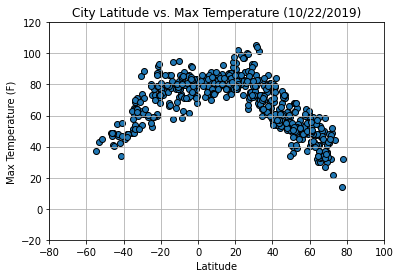

In [113]:
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],edgecolors='k')
plt.title('City Latitude vs. Max Temperature (10/22/2019)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid()

plt.savefig('01_Lat_vs_MaxTemp.png')

plt.show()


## Latitude vs. Humidity Plot

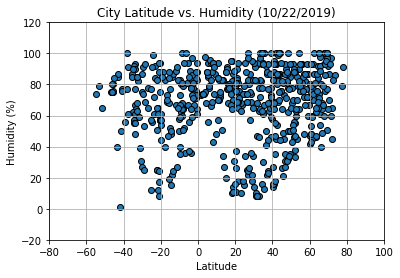

In [114]:

plt.scatter(weather_data['Lat'],weather_data['Humidity'],edgecolors='k')
plt.title('City Latitude vs. Humidity (10/22/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid()

plt.savefig('02_Lat_vs_Humid.png')

plt.show()


## Latitude vs. Cloudiness Plot

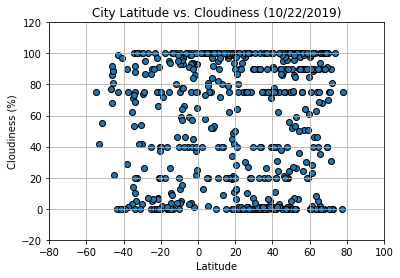

In [115]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],edgecolors='k')
plt.title('City Latitude vs. Cloudiness (10/22/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid()

plt.savefig('03_Lat_vs_Cloud.png')

plt.show()


## Latitude vs. Wind Speed Plot

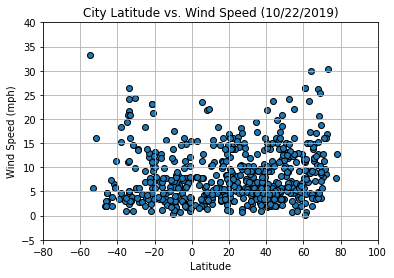

In [116]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'],edgecolors='k')
plt.title('City Latitude vs. Wind Speed (10/22/2019)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.grid()

plt.savefig('04_Lat_vs_Wind.png')

plt.show()


## Linear Regression

In [117]:
north_weather_df = weather_data.loc[weather_data["Lat"] >= 0]
north_weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,31,US,1601021058,80,42.60,-73.97,61.00,2.21
1,Dikson,100,RU,1601021059,86,73.51,80.55,44.49,30.36
2,Kapaa,90,US,1601020979,74,22.08,-159.32,80.60,16.11
3,Baní,19,DO,1601021062,82,18.28,-70.33,80.01,3.00
4,Barrow,90,US,1601021063,97,71.29,-156.79,32.00,11.41
...,...,...,...,...,...,...,...,...,...
560,Paamiut,100,GL,1601021661,74,61.99,-49.67,43.45,42.26
561,Kokkola,46,FI,1601021789,76,63.84,23.13,57.20,14.99
562,Broome,1,US,1601021791,87,42.25,-75.83,57.20,2.42
563,Nishihara,75,JP,1601021792,74,26.18,127.76,82.40,10.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

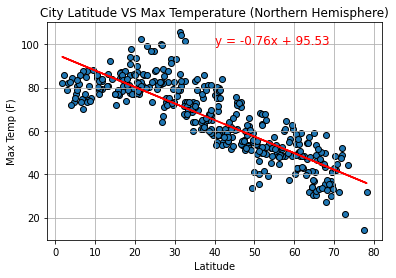

In [118]:
from scipy.stats import linregress


# Run the regression and store each of the returned values
y_values = north_weather_df['Max Temp']
x_values = north_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(north_weather_df['Lat'],north_weather_df['Max Temp'],edgecolors='k')
plt.ylabel("Max Temp (F)")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Max Temperature (Northern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Max_Temp_North_Linereg.png")
plt.show()


In [119]:
south_weather_df = weather_data.loc[weather_data["Lat"] < 0]
south_weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,Aripuanã,5,BR,1601021064,80,-9.17,-60.63,73.71,2.17
10,Touros,40,BR,1601021071,94,-5.20,-35.46,71.60,4.70
11,Cape Town,75,ZA,1601021072,67,-33.93,18.42,62.01,24.16
16,Ushuaia,75,AR,1601021047,74,-54.80,-68.30,37.40,33.33
19,Port Alfred,5,ZA,1601021083,64,-33.59,26.89,68.70,21.56
...,...,...,...,...,...,...,...,...,...
549,Panguna,100,PG,1601021774,100,-6.32,155.48,71.04,0.81
552,Manta,40,EC,1601021778,88,-0.95,-80.73,71.60,8.05
553,Samfya,46,ZM,1601021779,27,-11.36,29.56,80.60,7.36
557,Kindu,90,CD,1601021784,71,-2.95,25.95,78.91,5.95


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

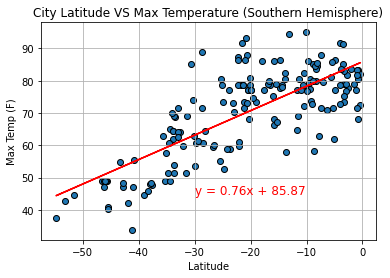

In [120]:
# Run the regression and store each of the returned values
y_values = south_weather_df['Max Temp']
x_values = south_weather_df['Lat']

regression_values = x_values * slope + intercept

plt.scatter(south_weather_df["Lat"],south_weather_df["Max Temp"],edgecolors='k')
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.title("City Latitude VS Max Temperature (Southern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=12,color="red")

plt.savefig("City_Lat_VS_Max_Temp_South_Linereg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

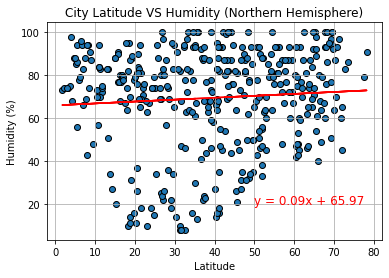

In [121]:
# Run the regression and store each of the returned values
y_values = north_weather_df['Humidity']
x_values = north_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(north_weather_df['Lat'],north_weather_df['Humidity'],edgecolors='k')
plt.ylabel("Humidity (%)")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Humidity (Northern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Humidity_North_Linereg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

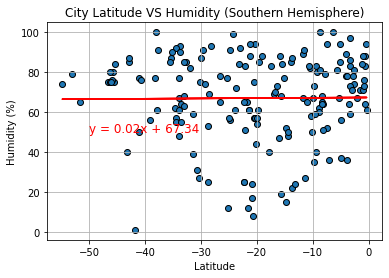

In [122]:
# Run the regression and store each of the returned values
y_values = south_weather_df['Humidity']
x_values = south_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(south_weather_df['Lat'],south_weather_df['Humidity'],edgecolors='k')
plt.ylabel("Humidity (%)")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Humidity (Southern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Humidity_South_Linereg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

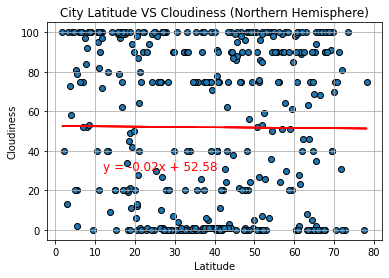

In [123]:
# Run the regression and store each of the returned values
y_values = north_weather_df["Cloudiness"]
x_values = north_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(north_weather_df['Lat'],north_weather_df['Cloudiness'],edgecolors='k')
plt.ylabel("Cloudiness")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Cloudiness (Northern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Cloudiness_North_Linereg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

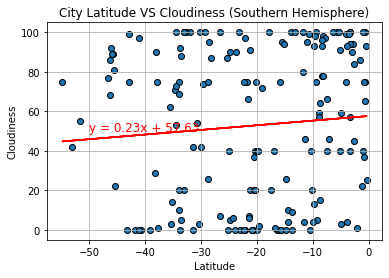

In [124]:
y_values = south_weather_df['Cloudiness']
x_values = south_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(south_weather_df['Lat'],south_weather_df["Cloudiness"],edgecolors='k')
plt.ylabel("Cloudiness")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Cloudiness (Southern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Cloudiness_South_Linereg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

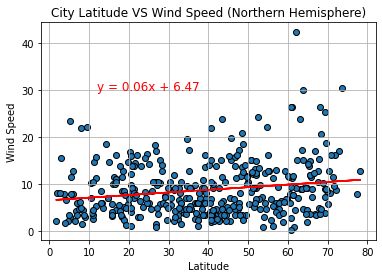

In [125]:
# Run the regression and store each of the returned values
y_values = north_weather_df["Wind Speed"]
x_values = north_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(north_weather_df['Lat'],north_weather_df['Wind Speed'],edgecolors='k')
plt.ylabel("Wind Speed")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Wind Speed (Northern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Wind_Speed_North_Linereg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

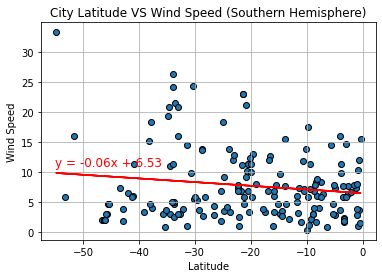

In [126]:
y_values = south_weather_df['Wind Speed']
x_values = south_weather_df['Lat']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)

# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(south_weather_df['Lat'],south_weather_df["Wind Speed"],edgecolors='k')
plt.ylabel("Wind Speed")
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.title("City Latitude VS Wind Speed (Southern Hemisphere)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=12,color="red")


plt.savefig("City_Lat_VS_Wind_Speed_South_Linereg.png")
plt.show()